# φ-funksjonen

## Introduksjon

Phifunksjonen er en aritmetisk funksjon som kanskje er mest kjent for sin bruk innen kryptering. I oppgaven vår skal vi hente data fra et datasett på nettet, og vi har lagd og testet hypoteser rundt datasettet

## Metodikk

Vi fikk oppgitt datasettet http://primefan.tripod.com/Phi500.html, som vi måtte “scrape” data fra. Ved hjelp av bibliotekene requests og lxml fikk vi lagd en liste med alle verdier på siden. Denne delte vi opp i en liste for x-verdier, y-verdier og divisorer.

### "Scraper" nettsiden for x-verdier, y-verdier og divisorer

In [1]:
from lxml import html
import requests

page = requests.get('http://primefan.tripod.com/Phi500.html') #fullstendig nedlastning av html-koden til siden med requests
tree = html.fromstring(page.content) #bruker pakken lxml til å laste koden inn i et pent html-tre

pageValues = tree.xpath('//td/text()') #finner verdiene vi er ute etter, som alle befinner seg i en text-gren

#Definerer lister hvor vi putter de forskjellige kolonneverdiene
xValues = []
yValues = []
divisors = []

#Plasserer alle verdiene i riktige lister. Caster x- og y-verdiene til heltall
for num, value in enumerate(pageValues):
    if(num % 3 == 0):
        xValues.append(int(value))
    elif(num % 3 == 1):
        yValues.append(int(value))
    elif(num % 3 == 2):
        divisors.append(value)

### CSV

Skriver den hentede dataen inn i en CSV-fil

In [2]:
import pandas

data = pandas.DataFrame(yValues,xValues)

data.to_csv('phitall.csv')
print(pandas.read_csv('phitall.csv').tail())

     Unnamed: 0    0
495         496  240
496         497  420
497         498  164
498         499  498
499         500  200


### Plotting

Plotter datasettet vi har "scrapet"

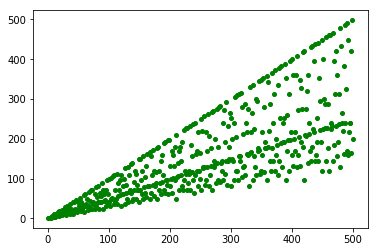

In [9]:
import matplotlib.pyplot as plt

plt.plot(xValues, yValues, color='green', marker='o', linewidth=0, markersize=4)

### Utvider datasettet

Plotter det nye datasettet, fram til 2000

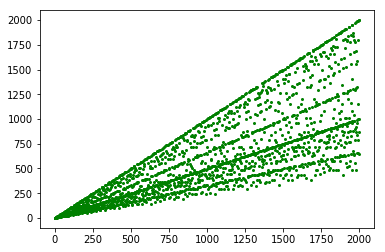

In [4]:
def fractions(a, b):
    if b == 0:
        return a
    return fractions(b, a%b)

def phi(n):
    amount = 0
    for k in range(1, n + 1):
        if fractions(n, k) == 1:
            amount += 1
    return amount

def runto(høyest):
    f=[]
    for x in range (høyest):
        f.append(phi(x))
    return f

def primtallSjekk(num):
    for i in range(2,num):
        if (num % i) == 0:
            return False
    else:
        return True

utvidetYValues = runto(2000)
plt.plot(range(2000), utvidetYValues, color='green', marker='o', linewidth=0, markersize=2)

### Hypotese

Vi kan finne $φ(n)$ ved å primtallsfaktorisere tallet. For enhver unik primtallsfaktor p til n, ganger vi med (p-1). Hvis samme primtallsfaktor gjentas i ganger, ganger vi videre med p^(i-1)

1. Dersom n kan skrives som $2^i$, blir $φ(n) = 2^{i-1}$, hvor $i ∈ Z$
1. Dersom n kan skrives som $3^i$, blir $φ(n) = 2*3^{i-1}$, hvor $i ∈ Z$
1. Dersom n kan skrives som $p^i$, blir $φ(n) = (p-1)*p^{i-1}$, hvor $i ∈ Z$
1. Dette gjelder for alle primtallsfaktorene $p_1$, $p_2$ $...$ $p_n$ til $n$, hvor $a$ er antallet av $p_1$, $b$ er antallet av $p_2$ $...$ $z$ er antallet av $p_n$, er $φ(n)$:
<br>
<br>
$$ φ(p_1^a) * φ(p_2^b)  ...   φ(p_n^z)$$
<br>
<center>som utvidet blir <center>
<br>
$$(p_1-1)*p_1^{a-1} * \\ (p_2-1)*p_2^{b-1_2} \\ ... \\ (p_n-1)*p_n^{z-1}, $$

Med dette kan vi utlede φ av et primtall n: $φ(n)=(n-1)$

Her har vi plottet φ av alle tallene i grønn, produktet av to primtall i blå og primtall i rød

(0, 40)

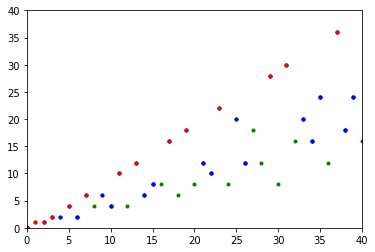

In [20]:
Primtall=[]
Primphi=[]
produkt=[]
produktphi=[]
primto=[]
tophi=[]

for x in range(len(utvidetYValues)):
    if primtallSjekk(x):
        Primtall.append(x)
        Primphi.append(phi(x))
        
for x in range(len(utvidetYValues)):
    for q in range(2, len(Primtall)):
        if x/Primtall[q] in Primtall:
            produkt.append(x) #Dette et produkt av to primtall
            produktphi.append(phi(x))
            
plt.plot(range(2000), utvidetYValues, color='green', marker='o', linewidth=0, markersize=3)
plt.plot(produkt, produktphi, color='blue', marker='o', linewidth=0, markersize=3)
plt.plot(Primtall, Primphi, color='red', marker='o', linewidth=0, markersize=3)
axes = plt.gca()
axes.set_xlim([0,40])
axes.set_ylim([0,40])

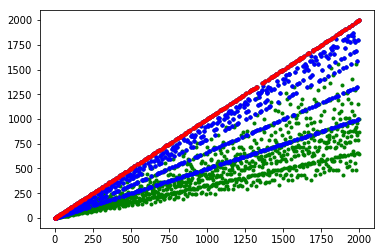

In [21]:
plt.plot(range(2000), utvidetYValues, color='green', marker='o', linewidth=0, markersize=3)
plt.plot(produkt, produktphi, color='blue', marker='o', linewidth=0, markersize=3)
plt.plot(Primtall, Primphi, color='red', marker='o', linewidth=0, markersize=3)

## Resultater

Samsvarer hypotesen med datasettet?

#### Stikkprøver

Vi tar noen tilfeldige tall:
12, 49, 78, 97, 210, 450

Finner primtallsfaktorer <br>
$$
12 = 2*2*3 \\
49 = 6*7 = 42 \\
78 = 2*12 = 24 \\
97 = 96 \\
210 = 2*4*6 = 48 \\
450 = 2*3*4*5 = 120 \\
$$


Metoden vår sier at phi av tallene blir:

$$
φ(12) = 1*2*2 = 4 \\
φ(49) = 6*7 = 42 \\
φ(78) = 1*2*12 = 24 \\
φ(97) = 96 \\
φ(210) = 1*2*4*6 = 48 \\
φ(450) = 1*2*3*4*5 = 120 \\
$$

Vi leser av verdiene fra datasettet, og ser at de samsvarer:
$$
φ(12) = 4 \\
φ(49) =42 \\
φ(78) = 24 \\
φ(97) = 96 \\
φ(210) = 48 \\
φ(450) = 120 \\
$$

Metoden vår stemmer ovenfor datasettet


## Analyse

φ-funksjonen, og andre liknende funksjoner, brukes ofte til kryptering. Her er en forklaring og demonstrasjon av hvordan dette kan utføres, med RSA-kryptering

### RSA

RSA-kryptering er en type kryptering som tar bruk av Eulers totientfunksjon. Det er en asymmetrisk krypteringsalgoritme, som vil si at man bruker forskjellige nøkler for kryptering og dekryptering. Det er en offentlig nøkkel, som brukes for å kryptere, som mottakeren av informasjonen (personen som vil dekryptere) lager ved å gange to veldig store primtall sammen. Siden denne nøkkelen er så stor kreves det veldig mye datakraft for å dekryptere med den, I stedet bruker man den private nøkkelen, som er et mye mindre tall, og som regnes ut ved å bruke phi av den offentlige nøkkelen. Siden vi vet primtallsfaktorene til tallet er dette lett å regne ut for oss, men det er veldig krevende hvis man bare har den offentlige nøkkelen.

In [6]:
import math, random

p = 1117 #p og q er våre to primtall
q = 887

n = p * q #n er en del av den offentlige nøkkelen
b = (p-1)*(q-1) #b er phi av n, regnet ut på en måte som krever veldig lite datakraft i forhold til å bruke phi

primiske = []
for x in range(b):
    if fractions(x,b) == 1:
        primiske.append(x)
e = random.choice(primiske) #e er den andre delen av den offentlige nøkkelen

d = 13
while (d*e)%b != 1:
    d += 1

print("e =", e,"og n =", n)

e = 1213 og n = 990779


Nå har vi generert våre offentlige nøkler og vår private nøkkel. Det neste steget er å sende den offentlige nøkkelen til de som skal sende den krypterte informasjonen

In [7]:
melding = 14 #dette er meldingen vi har lyst til å sende
kryptert = (melding**e)%n #dette er den meldingen kryptert
print("Den krypterte meldingen er", kryptert)

Den krypterte meldingen er 3001


Nå har senderen kryptert meldingen sin. Denne kan trygt sendes, uten av noen andre enn de med den private kan dekryptere den.

In [8]:
dekryptert = (kryptert**d)%n #her bruker vi den private nøkkelen, som bare vi vet, til å dekryptere meldingen
print("Den dekrypterte meldingen er", dekryptert)

Den dekrypterte meldingen er 14


## Diskusjon

Metoden vi har brukt kan sies å være umatematisk, fordi vi ikke finner noe generelt uttrykk for φ(x), men i stedet kun finner φ(x) for enkelte tall og prøver å finne trender i datasettet. Dermed kreves det enormt mange ressurser for å finne φ(x)

φ(x) er noe fremmed for matematikken vi kjenner fordi “x” bare kan være naturlige tall.

Det vi har gjort kan være brukbart fordi det kan hjelpe oss med å komme nærmere en funksjon for φ(x). Det kan også eventuelt hjelpe oss med å løse visse matematiske problemer med tall innenfor datasettet.
